<a href="https://colab.research.google.com/github/the-confused-genius/sales-prediction/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales prediction from existing customers
Using k-nearest neighbors algorithm

##Importing the libraries 

In [ ]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

##Choose Dataset file from local Directory 
or from the given github link

In [ ]:
#from google.colab import files
#uploaded_file = files.upload()
link = 'https://raw.githubusercontent.com/the-confused-genius/sales-prediction/main/Sales.csv'

#Loading the dataset into the memory

In [ ]:
df = pd.read_csv(link)
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


#Summarizing the dataset 

In [ ]:
print("The shape of the dataset is ",df.shape)
print("\n\nChecking for null values in the dataset")
print(df.isna().sum())
print("\n\nChecking the datatype of each column")
df.info()

The shape of the dataset is  (400, 5)


Checking for null values in the dataset
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


Checking the datatype of each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#Segregating dataset into x and y 
where x is independent variable
and y is dependent variable



* The Independent variables are Age and Salary 
* The Target or the dependent variable is Purchased 

In [ ]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

#alternative code 
#x = df.iloc[:, [2, 3]].values
#y = df.iloc[:, 4].values

Checking the dimension of the x and y variables

In [ ]:
print("The dimension of x is ",x.ndim)
print("The dimension of y is ",y.ndim)

The dimension of x is  2
The dimension of y is  1


#Splitting the dataset into Train and Test parts

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#Feature Scaling
we scale our data to make all the features contribute equally to the result


*   fit.transform - fit method is calculating the mean and variance of each of the feature present in our data
*   transform - transform method is transforming all the features using the repective mean and variance 

we want our test to be a completely new and surprise set for our model



In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Training the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model.fit(x_train,y_train)

KNeighborsClassifier()

#Testing the model

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test = np.array(y_test)
num = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)
print(num)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


#Checking the accuracy of the model 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)

print("confusion matrix :")
print(cm)

print("Accuracy of the model is {0}%".format(accuracy_score(y_test,y_pred)*100))

confusion matrix :
[[55  3]
 [ 1 21]]
Accuracy of the model is 95.0%


#Data Visualization

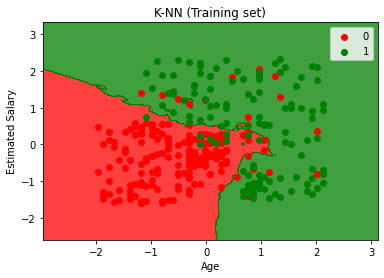

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
%matplotlib inline


X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

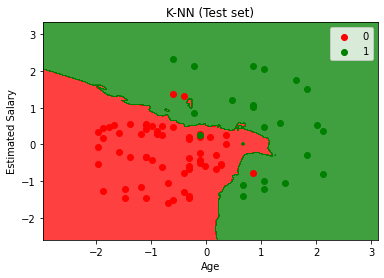

In [ ]:
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#Predicting by taking the inputs

In [ ]:
age = int(input("Enter the Age of the customer :"))
sal = int(input("Enter the Salary of the customer :"))
newcust = [[age,sal]]
result = model.predict(sc.transform(newcust))
if result==1:
  print("The customer will buy the product")
else:
  print("The customer will not but the product")

Enter the Age of the customer :32
Enter the Salary of the customer :150000
The customer will buy the product
